In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data= pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
x= np.array(data["YearsExperience"])
x= x.reshape((len(x),1))
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
x.shape

(30, 1)

In [13]:
y=np.array(data["Salary"])
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [14]:
y.shape

(30,)

In [41]:
#splitting
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8, random_state=29633)

In [42]:
xtest

array([[ 9.5],
       [ 7.9],
       [ 3.9],
       [10.3],
       [ 5.9],
       [ 2. ]])

In [43]:
#building the model
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [44]:
#Train model
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#prediction
ypred= model.predict(xtest)
ypred

array([115333.0622742 , 100285.1955644 ,  62665.5287899 , 122856.9956291 ,
        81475.36217715,  44796.18707202])

In [46]:

xtest

array([[ 9.5],
       [ 7.9],
       [ 3.9],
       [10.3],
       [ 5.9],
       [ 2. ]])

In [47]:
ytest

array([116969., 101302.,  63218., 122391.,  81363.,  43525.])

In [48]:
#R2 score
from sklearn.metrics import r2_score
r2= r2_score (ytest,ypred)
r2

0.9987877792008909

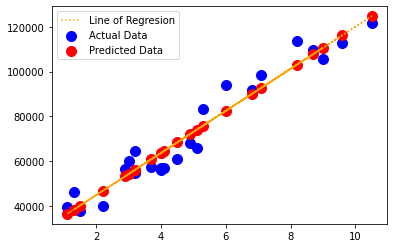

In [49]:
#plotting line of regression for training sample
plt.scatter(xtrain, ytrain, color="blue", label="Actual Data", s=100)
plt.scatter(xtrain, model.predict(xtrain), color="red", label="Predicted Data", s=100)
plt.plot(xtrain,model.predict(xtrain), color="orange", linestyle="dotted", label="Line of Regresion")
plt.legend()
plt.show()




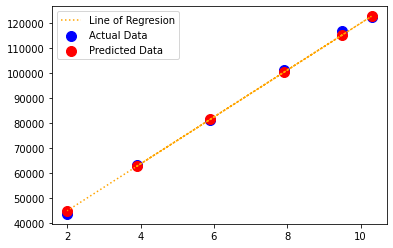

In [50]:
#plotting line of regression for test sample
plt.scatter(xtest, ytest, color="blue", label="Actual Data", s=100)
plt.scatter(xtest,ypred, color="red", label="Predicted Data", s=100)
plt.plot(xtest,ypred, color="orange", linestyle="dotted", label="Line of Regresion")
plt.legend()
plt.show()


In [51]:
#y intercept
c=model.intercept_
#slope
m= model.coef_
print(m,c)

[9404.91669362] 25986.353684766807


In [52]:
# y= 9312*x +26780 

In [53]:
### Increase accuracy
score = list()
for i in range(100000):
  xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.8,random_state=i)
  model_1 = LinearRegression()
  model_1.fit(xtrain1,ytrain1)
  ypred1 = model_1.predict(xtest1)
  r2_1 = r2_score(ytest1,ypred1)
  score.append(r2_1)

In [54]:
np.max(score)

0.9987877792008909

In [57]:
np.argmax(score)

29633

In [58]:
### Predict for a new sample
years = float(input("Enter Work Exp. in Years - "))
salary = model.predict([[years]])
print("The estimated salary would be Rs" + str(round(salary[0])))

Enter Work Exp. in Years - 10.3
The estimated salary would be Rs122857


In [59]:
#save the model
import joblib
joblib.dump(model, "salary.pkl")

['salary.pkl']

In [60]:
#load the  model
mymodel= joblib.load("/content/salary.pkl")